In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import scipy as sp
import torch.nn
from urllib.request import urlopen
import requests
import collections
from bs4 import BeautifulSoup
from django.core.validators import URLValidator
from django.core.exceptions import ValidationError
import re
import lxml.html as lh
import itertools

In [2]:
def web_scrape(url):
  r = requests.get(url)
  content = r.content
  b_soup = BeautifulSoup(content, 'html.parser')
  return b_soup

In [3]:
url = "https://sports.yahoo.com/"
soup = web_scrape(url)

In [4]:
soup.body.findAll(text='NBA')

['NBA']

In [5]:
links = []
for link in soup.findAll('a'):
  links.append(link.get('href'))

In [6]:
links

['#Navigation',
 '#Main',
 '#Aside',
 'https://www.yahoo.com/',
 'https://mail.yahoo.com/?.intl=us&.lang=en-US',
 'https://news.yahoo.com/',
 'https://finance.yahoo.com/',
 'https://sports.yahoo.com/',
 'https://www.yahoo.com/entertainment/',
 'https://search.yahoo.com/search/',
 'https://mobile.yahoo.com/',
 'https://everything.yahoo.com/',
 'https://yhoo.it/3euOitk',
 'https://sports.yahoo.com/',
 'https://mail.yahoo.com/?activity=uh-mail&.intl=us&.lang=en-US&.partner=none&.src=sports&pspid=25664825',
 'https://sports.yahoo.com',
 'https://sports.yahoo.com/fantasy/',
 'https://sports.yahoo.com/olympics/tokyo-2021/',
 'https://sports.yahoo.com/nfl/',
 'https://sports.yahoo.com/nba/',
 'https://sports.yahoo.com/mlb/',
 'https://sports.yahoo.com/college-football/',
 'https://sports.yahoo.com/golf/',
 'https://sports.yahoo.com/sportsbook/',
 'https://sports.yahoo.com/mma/',
 'https://sports.yahoo.com/nhl/',
 'https://sports.yahoo.com/soccer/',
 'https://sports.yahoo.com/wnba/',
 'https:/

In [7]:
def search(word):
  relevant_links = []
  for link in links:
    if link != None and (word in link or word.lower() in link):
      relevant_links.append(link)
  return relevant_links

In [8]:
matching_links = search('NBA')

In [9]:
matching_links

['https://sports.yahoo.com/nba/',
 'https://sports.yahoo.com/wnba/',
 '/giannis-antetokounmpo-the-universally-beloved-nba-superstar-200002102.html']

In [10]:
b_soups = []
for link in matching_links:
  try:
    URLValidator(link)
    b_soups.append(web_scrape(link))
  except:
    print('Invalid Link')

Invalid Link


In [11]:
len(b_soups)

2

In [12]:
b_soups

[<!DOCTYPE html>
 <html class="NoJs desktop" id="atomic" lang="en-US"><head><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta content="text/html; charset=utf-8" http-equiv="content-type"/><title>NBA News, Scores, Fantasy Games and Highlights 2020-21 | Yahoo Sports</title><meta content="NBA, National Basketball Association" name="keywords"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="on" http-equiv="x-dns-prefetch-control"/><link href="https://de.sports.yahoo.com/nba" hreflang="de-DE" rel="alternate"/><link href="https://ca.sports.yahoo.com/nba" hreflang="en-CA" rel="alternate"/><link href="https://uk.sports.yahoo.com/nba" hreflang="en-GB" rel="alternate"/><link href="https://sports.yahoo.com/nba" hreflang="en-US" rel="alternate"/><link href="https://es.sports.yahoo.com/nba" hreflang="es-ES" rel="alternate"/><link href="https://es-us.deportes.yahoo.com/nba" hreflang="es-US" rel="alternate"/><link href="h

In [13]:
def search_news_by_team(team):
  news = []
  for b_soup in b_soups:
    news_per_page = b_soup.body.findAll(text=team)
    news.extend(news_per_page)
  return news

In [14]:
news = search_news_by_team('Rockets')

In [15]:
news

[]

In [16]:
url = "https://www.espn.com/nba/stats/player/_/table/offensive/sort/avgPoints/dir/desc"
page = urlopen(url)
html = page.read().decode("utf-8")
html

'\n        <!doctype html>\n        <html lang="en">\n            <head>\n                <meta charSet="utf-8" />\n\n                <!-- ESPNFITT | b12d7fc1d252 | 4725 | 2723bafbd3f8349422300b6f33a3d5e5c62272c7 | Sat, 24 Jul 2021 00:07:39 GMT -->\n                <script type=\'text/javascript\' src="https://dcf.espn.com/TWDC-DTCI/prod/Bootstrap.js"></script>\n                <script type=\'text/javascript\' >\n        ;(function(){\n            function gc(n){n=document.cookie.match("(^|;) ?"+n+"=([^;]*)(;|$)");return n?n[2]:null}function sc(n){document.cookie=n}function smpl(n){n/=100;return!!n&&Math.random()<=n}var _nr=!1,_nrCookie=gc("_nr");null!==_nrCookie?"1"===_nrCookie&&(_nr=!0):smpl(100)?(_nr=!0,sc("_nr=1; path=/")):(_nr=!1,sc("_nr=0; path=/"));;\n            _nr && window.NREUM||(NREUM={});NREUM.init={distributed_tracing:{enabled:true}};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){va

In [17]:
re.findall("RK", html)

['RK', 'RK']

In [18]:
page = requests.get("https://www.espn.com/nba/stats/player/_/table/offensive/sort/avgPoints/dir/desc")
doc = lh.fromstring(page.content)
doc

<Element html at 0x7fabb3500180>

In [19]:
tr_elements = doc.xpath('//tr')

In [20]:
cols = []
for t in tr_elements[0]:
    name = t.text_content()
    cols.append(name)

In [21]:
df = pd.DataFrame(columns=['Rank', 'First Name', 'Last Name', 'Team'])

In [22]:
for idx in range(1,15):
  if idx < 10: fullstr = (tr_elements[idx].text_content())[1:]
  else: fullstr = (tr_elements[idx].text_content())[2:]
  team = fullstr[-3:]
  splittedstr = re.findall('([A-Z][a-z]+)', fullstr)
  splittedstr = [idx, *splittedstr]
  splittedstr.append(team)
  print(fullstr)
  print(splittedstr)
  df.loc[len(df)] = splittedstr

Luka DoncicDAL
[1, 'Luka', 'Doncic', 'DAL']
Damian LillardPOR
[2, 'Damian', 'Lillard', 'POR']
Kevin DurantBKN
[3, 'Kevin', 'Durant', 'BKN']
Donovan MitchellUTAH
[4, 'Donovan', 'Mitchell', 'TAH']
Jayson TatumBOS
[5, 'Jayson', 'Tatum', 'BOS']
Kawhi LeonardLAC
[6, 'Kawhi', 'Leonard', 'LAC']
Ja MorantMEM
[7, 'Ja', 'Morant', 'MEM']
Giannis AntetokounmpoMIL
[8, 'Giannis', 'Antetokounmpo', 'MIL']
Bradley BealWSH
[9, 'Bradley', 'Beal', 'WSH']
Nikola JokicDEN
[10, 'Nikola', 'Jokic', 'DEN']
Trae YoungATL
[11, 'Trae', 'Young', 'ATL']
Joel EmbiidPHI
[12, 'Joel', 'Embiid', 'PHI']
Devin BookerPHX
[13, 'Devin', 'Booker', 'PHX']
Paul GeorgeLAC
[14, 'Paul', 'George', 'LAC']


In [23]:
df.head(10)

,Rank,First Name,Last Name,Team
0,1,Luka,Doncic,DAL
1,2,Damian,Lillard,POR
2,3,Kevin,Durant,BKN
3,4,Donovan,Mitchell,TAH
4,5,Jayson,Tatum,BOS
5,6,Kawhi,Leonard,LAC
6,7,Ja,Morant,MEM
7,8,Giannis,Antetokounmpo,MIL
8,9,Bradley,Beal,WSH
9,10,Nikola,Jokic,DEN


In [24]:
lookup_url = "https://www.basketball-reference.com/leagues/NBA_2021_per_game.html"
html = urlopen(lookup_url)
soup = BeautifulSoup(html)

In [25]:
tbl = soup.findAll('tr', limit=2)
headers = [hdr.getText() for hdr in tbl[0].findAll('th')]
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [26]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in row.findAll('td')] for row in rows]

In [27]:
player_stats

[['Precious Achiuwa',
  'PF',
  '21',
  'MIA',
  '61',
  '4',
  '12.1',
  '2.0',
  '3.7',
  '.544',
  '0.0',
  '0.0',
  '.000',
  '2.0',
  '3.7',
  '.546',
  '.544',
  '0.9',
  '1.8',
  '.509',
  '1.2',
  '2.2',
  '3.4',
  '0.5',
  '0.3',
  '0.5',
  '0.7',
  '1.5',
  '5.0'],
 ['Jaylen Adams',
  'PG',
  '24',
  'MIL',
  '7',
  '0',
  '2.6',
  '0.1',
  '1.1',
  '.125',
  '0.0',
  '0.3',
  '.000',
  '0.1',
  '0.9',
  '.167',
  '.125',
  '0.0',
  '0.0',
  '',
  '0.0',
  '0.4',
  '0.4',
  '0.3',
  '0.0',
  '0.0',
  '0.0',
  '0.1',
  '0.3'],
 ['Steven Adams',
  'C',
  '27',
  'NOP',
  '58',
  '58',
  '27.7',
  '3.3',
  '5.3',
  '.614',
  '0.0',
  '0.1',
  '.000',
  '3.3',
  '5.3',
  '.620',
  '.614',
  '1.0',
  '2.3',
  '.444',
  '3.7',
  '5.2',
  '8.9',
  '1.9',
  '0.9',
  '0.7',
  '1.3',
  '1.9',
  '7.6'],
 ['Bam Adebayo',
  'C',
  '23',
  'MIA',
  '64',
  '64',
  '33.5',
  '7.1',
  '12.5',
  '.570',
  '0.0',
  '0.1',
  '.250',
  '7.1',
  '12.4',
  '.573',
  '.571',
  '4.4',
  '5.5',
  '.7

In [28]:
player_stats = pd.DataFrame(player_stats, columns=headers)

In [29]:
tbl_filtered = player_stats[player_stats['Player'] == 'James Harden']

In [30]:
tbl_filtered.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
266,James Harden,PG-SG,31,TOT,44,43,36.6,7.8,16.7,.466,...,.861,0.8,7.1,7.9,10.8,1.2,0.8,4.0,2.3,24.6
267,James Harden,SG,31,HOU,8,8,36.3,7.5,16.9,.444,...,.883,0.6,4.5,5.1,10.4,0.9,0.8,4.3,1.8,24.8
268,James Harden,PG,31,BRK,36,35,36.6,7.8,16.6,.471,...,.856,0.8,7.7,8.5,10.9,1.3,0.8,4.0,2.4,24.6


In [31]:
df['Player'] = df['First Name'] + ' ' + df['Last Name']
df.head()

,Rank,First Name,Last Name,Team,Player
0,1,Luka,Doncic,DAL,Luka Doncic
1,2,Damian,Lillard,POR,Damian Lillard
2,3,Kevin,Durant,BKN,Kevin Durant
3,4,Donovan,Mitchell,TAH,Donovan Mitchell
4,5,Jayson,Tatum,BOS,Jayson Tatum


In [32]:
player_stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,...,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,...,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,...,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


In [33]:
full_stats = pd.merge(df, player_stats)

In [34]:
full_stats

,Rank,First Name,Last Name,Team,Player,Pos,Age,Tm,G,GS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2,Damian,Lillard,POR,Damian Lillard,PG,30,POR,67,67,...,.928,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8
1,3,Kevin,Durant,BKN,Kevin Durant,PF,32,BRK,35,32,...,.882,0.4,6.7,7.1,5.6,0.7,1.3,3.4,2.0,26.9
2,4,Donovan,Mitchell,TAH,Donovan Mitchell,PG,24,UTA,53,53,...,.845,0.9,3.5,4.4,5.2,1.0,0.3,2.8,2.2,26.4
3,5,Jayson,Tatum,BOS,Jayson Tatum,SF,22,BOS,64,64,...,.868,0.8,6.6,7.4,4.3,1.2,0.5,2.7,1.9,26.4
4,6,Kawhi,Leonard,LAC,Kawhi Leonard,SF,29,LAC,52,52,...,.885,1.1,5.4,6.5,5.2,1.6,0.4,2.0,1.6,24.8
5,7,Ja,Morant,MEM,Ja Morant,PG,21,MEM,63,63,...,.728,0.9,3.1,4.0,7.4,0.9,0.2,3.2,1.4,19.1
6,8,Giannis,Antetokounmpo,MIL,Giannis Antetokounmpo,PF,26,MIL,61,61,...,.685,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1
7,9,Bradley,Beal,WSH,Bradley Beal,SG,27,WAS,60,60,...,.889,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3
8,11,Trae,Young,ATL,Trae Young,PG,22,ATL,63,63,...,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
9,12,Joel,Embiid,PHI,Joel Embiid,C,26,PHI,51,51,...,.859,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5


In [35]:
full_stats['PTS'] = pd.to_numeric(full_stats['PTS'])
full_stats['3P%'] = pd.to_numeric(full_stats['3P%'])

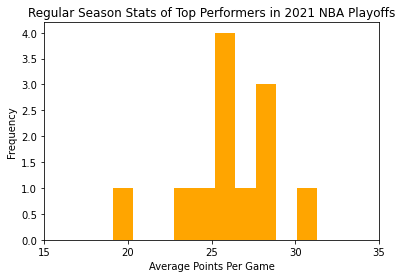

In [36]:
plt.hist(full_stats['PTS'], linewidth=2, color='orange')
plt.xticks([15, 20, 25, 30, 35])
plt.xlabel('Average Points Per Game')
plt.ylabel('Frequency')
plt.title('Regular Season Stats of Top Performers in 2021 NBA Playoffs')
plt.show()

**Regular Season Sharpshooters who Performed Top in the 2021 NBA Playoffs**



In [37]:
reg_season_sharpshooters = full_stats[full_stats['3P%'] > 0.37]
reg_season_sharpshooters

,Rank,First Name,Last Name,Team,Player,Pos,Age,Tm,G,GS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2,Damian,Lillard,POR,Damian Lillard,PG,30,POR,67,67,...,.928,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8
1,3,Kevin,Durant,BKN,Kevin Durant,PF,32,BRK,35,32,...,.882,0.4,6.7,7.1,5.6,0.7,1.3,3.4,2.0,26.9
2,4,Donovan,Mitchell,TAH,Donovan Mitchell,PG,24,UTA,53,53,...,.845,0.9,3.5,4.4,5.2,1.0,0.3,2.8,2.2,26.4
3,5,Jayson,Tatum,BOS,Jayson Tatum,SF,22,BOS,64,64,...,.868,0.8,6.6,7.4,4.3,1.2,0.5,2.7,1.9,26.4
4,6,Kawhi,Leonard,LAC,Kawhi Leonard,SF,29,LAC,52,52,...,.885,1.1,5.4,6.5,5.2,1.6,0.4,2.0,1.6,24.8
9,12,Joel,Embiid,PHI,Joel Embiid,C,26,PHI,51,51,...,.859,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5
11,14,Paul,George,LAC,Paul George,SF,30,LAC,54,54,...,.868,0.8,5.8,6.6,5.2,1.1,0.4,3.3,2.4,23.3


**Analyzing Teams' Championship Chances**

In [38]:
lookup_url = "https://www.basketball-reference.com/teams/"
html = urlopen(lookup_url)
soup = BeautifulSoup(html)

In [39]:
tbl = soup.findAll('tr', limit=2)
headers = [hdr.getText() for hdr in tbl[0].findAll('th')]
headers = headers[1:]
headers

['Lg',
 'From',
 'To',
 'Yrs',
 'G',
 'W',
 'L',
 'W/L%',
 'Plyfs',
 'Div',
 'Conf',
 'Champ']

In [40]:
rows = soup.findAll('tr')[1:]
team_stats = [[td.getText() for td in row.findAll('td')] for row in rows]

In [41]:
team_stats = pd.DataFrame(team_stats, columns=headers)

In [42]:
team_stats

,Lg,From,To,Yrs,G,W,L,W/L%,Plyfs,Div,Conf,Champ
0,NBA,1949-50,2020-21,72,5691,2807,2884,.493,47,12,0,1
1,NBA,1968-69,2020-21,53,4273,2109,2164,.494,34,6,0,0
2,NBA,1955-56,1967-68,13,1005,553,452,.550,12,6,0,1
3,NBA,1951-52,1954-55,4,281,91,190,.324,0,0,0,0
4,NBA,1949-50,1950-51,2,132,54,78,.409,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
125,ABA,1970-71,1975-76,6,503,200,303,.398,4,1,0,0
126,ABA,1969-70,1969-70,1,84,44,40,.524,1,0,0,0
127,ABA,1967-68,1968-69,2,156,82,74,.526,1,1,0,1
128,NBA/BAA,1946-47,1950-51,5,271,157,114,.579,4,2,0,0


In [43]:
franchises = []
for i in range(len(team_stats)):
  franchises.append(soup.findAll('tr')[i+1].findAll('th'))
franchises = [(np.array(item).flatten())[0] for item in franchises]
team_stats['Franchise'] = franchises

In [44]:
team_stats = team_stats.loc[:, ['Lg', 'Franchise', 'G', 'W', 'L', 'W/L%', 'Plyfs', 'Div', 'Conf', 'Champ']]
team_stats

,Lg,Franchise,G,W,L,W/L%,Plyfs,Div,Conf,Champ
0,NBA,Atlanta Hawks,5691,2807,2884,.493,47,12,0,1
1,NBA,Atlanta Hawks,4273,2109,2164,.494,34,6,0,0
2,NBA,St. Louis Hawks,1005,553,452,.550,12,6,0,1
3,NBA,Milwaukee Hawks,281,91,190,.324,0,0,0,0
4,NBA,Tri-Cities Blackhawks,132,54,78,.409,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
125,ABA,Virginia Squires,503,200,303,.398,4,1,0,0
126,ABA,Washington Capitols,84,44,40,.524,1,0,0,0
127,ABA,Oakland Oaks,156,82,74,.526,1,1,0,1
128,NBA/BAA,Washington Capitols,271,157,114,.579,4,2,0,0


In [45]:
team_stats = team_stats[team_stats['Lg'] == 'NBA']
team_stats

,Lg,Franchise,G,W,L,W/L%,Plyfs,Div,Conf,Champ
0,NBA,Atlanta Hawks,5691,2807,2884,.493,47,12,0,1
1,NBA,Atlanta Hawks,4273,2109,2164,.494,34,6,0,0
2,NBA,St. Louis Hawks,1005,553,452,.550,12,6,0,1
3,NBA,Milwaukee Hawks,281,91,190,.324,0,0,0,0
4,NBA,Tri-Cities Blackhawks,132,54,78,.409,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
86,NBA,Anderson Packers,64,37,27,.578,1,0,0,0
90,NBA,Denver Nuggets,62,11,51,.177,0,0,0,0
93,NBA,Indianapolis Olympians,269,132,137,.491,4,1,0,0
109,NBA,Sheboygan Red Skins,62,22,40,.355,1,0,0,0


**All-Time Win-Loss Percentage of Team with the Greatest Number of Championships**

In [53]:
opt_idx = np.argmax(team_stats['Champ'])
team_stats.iloc[opt_idx, :]

Lg                          NBA
Franchise    Los Angeles Lakers
G                          4919
W                          2970
L                          1949
W/L%                      0.604
Plyfs                        51
Div                          29
Conf                         19
Champ                        12
Name: 41, dtype: object

**Teams with the Largest Gap in Playoff Appearences and Championships Won**




In [55]:
team_stats.loc[:,'Plyfs'] = pd.to_numeric(team_stats['Plyfs'])
team_stats.loc[:,'Champ'] = pd.to_numeric(team_stats['Champ'])
opt_idx = np.argmax(team_stats.loc[:,'Plyfs'] - team_stats.loc[:,'Champ'])
team_stats.iloc[opt_idx, :]

Lg                          NBA
Franchise    Philadelphia 76ers
G                          5695
W                          2949
L                          2746
W/L%                      0.518
Plyfs                        51
Div                          12
Conf                          5
Champ                         3
Name: 58, dtype: object

**Analyzing the Relationship between All-Time Win-Loss Percentage and Championships Won**

In [48]:
team_stats.loc[:,'W/L%'] = pd.to_numeric(team_stats['W/L%'])

In [49]:
X = np.array(team_stats['W/L%']).reshape(-1,1)
y = np.array(team_stats['Champ'])

In [50]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.15788669129041422

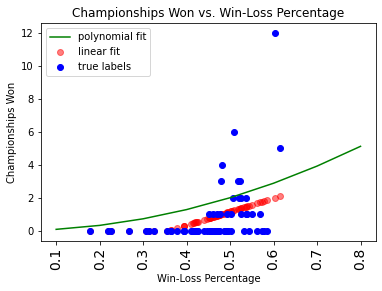

In [51]:
predictions = [0 if pred < 0 else pred for pred in reg.predict(X)]
plt.scatter(team_stats['W/L%'], predictions, color='red', label='linear fit', alpha=0.5)
plt.scatter(team_stats['W/L%'], team_stats['Champ'], color='blue', label='true labels')
t = np.arange(0.1,0.9,0.1)
plt.plot(t, 8 * t**2, color='green', label='polynomial fit')
plt.xticks(np.arange(0.1,0.9,0.1), fontsize=14, rotation=90)
plt.xlabel('Win-Loss Percentage')
plt.ylabel('Championships Won')
plt.legend(loc='upper left')
plt.title('Championships Won vs. Win-Loss Percentage')
plt.show()

**Predicting the Number of Championships Won for a Team with a 60% Win-Loss Percentage**

In [52]:
reg.predict(np.array([[0.60]]))

array([1.97714043])